In [6]:
import layoutparser as lp
from PIL import Image

image = Image.open("instructions/test_image2.jpg")

In [7]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

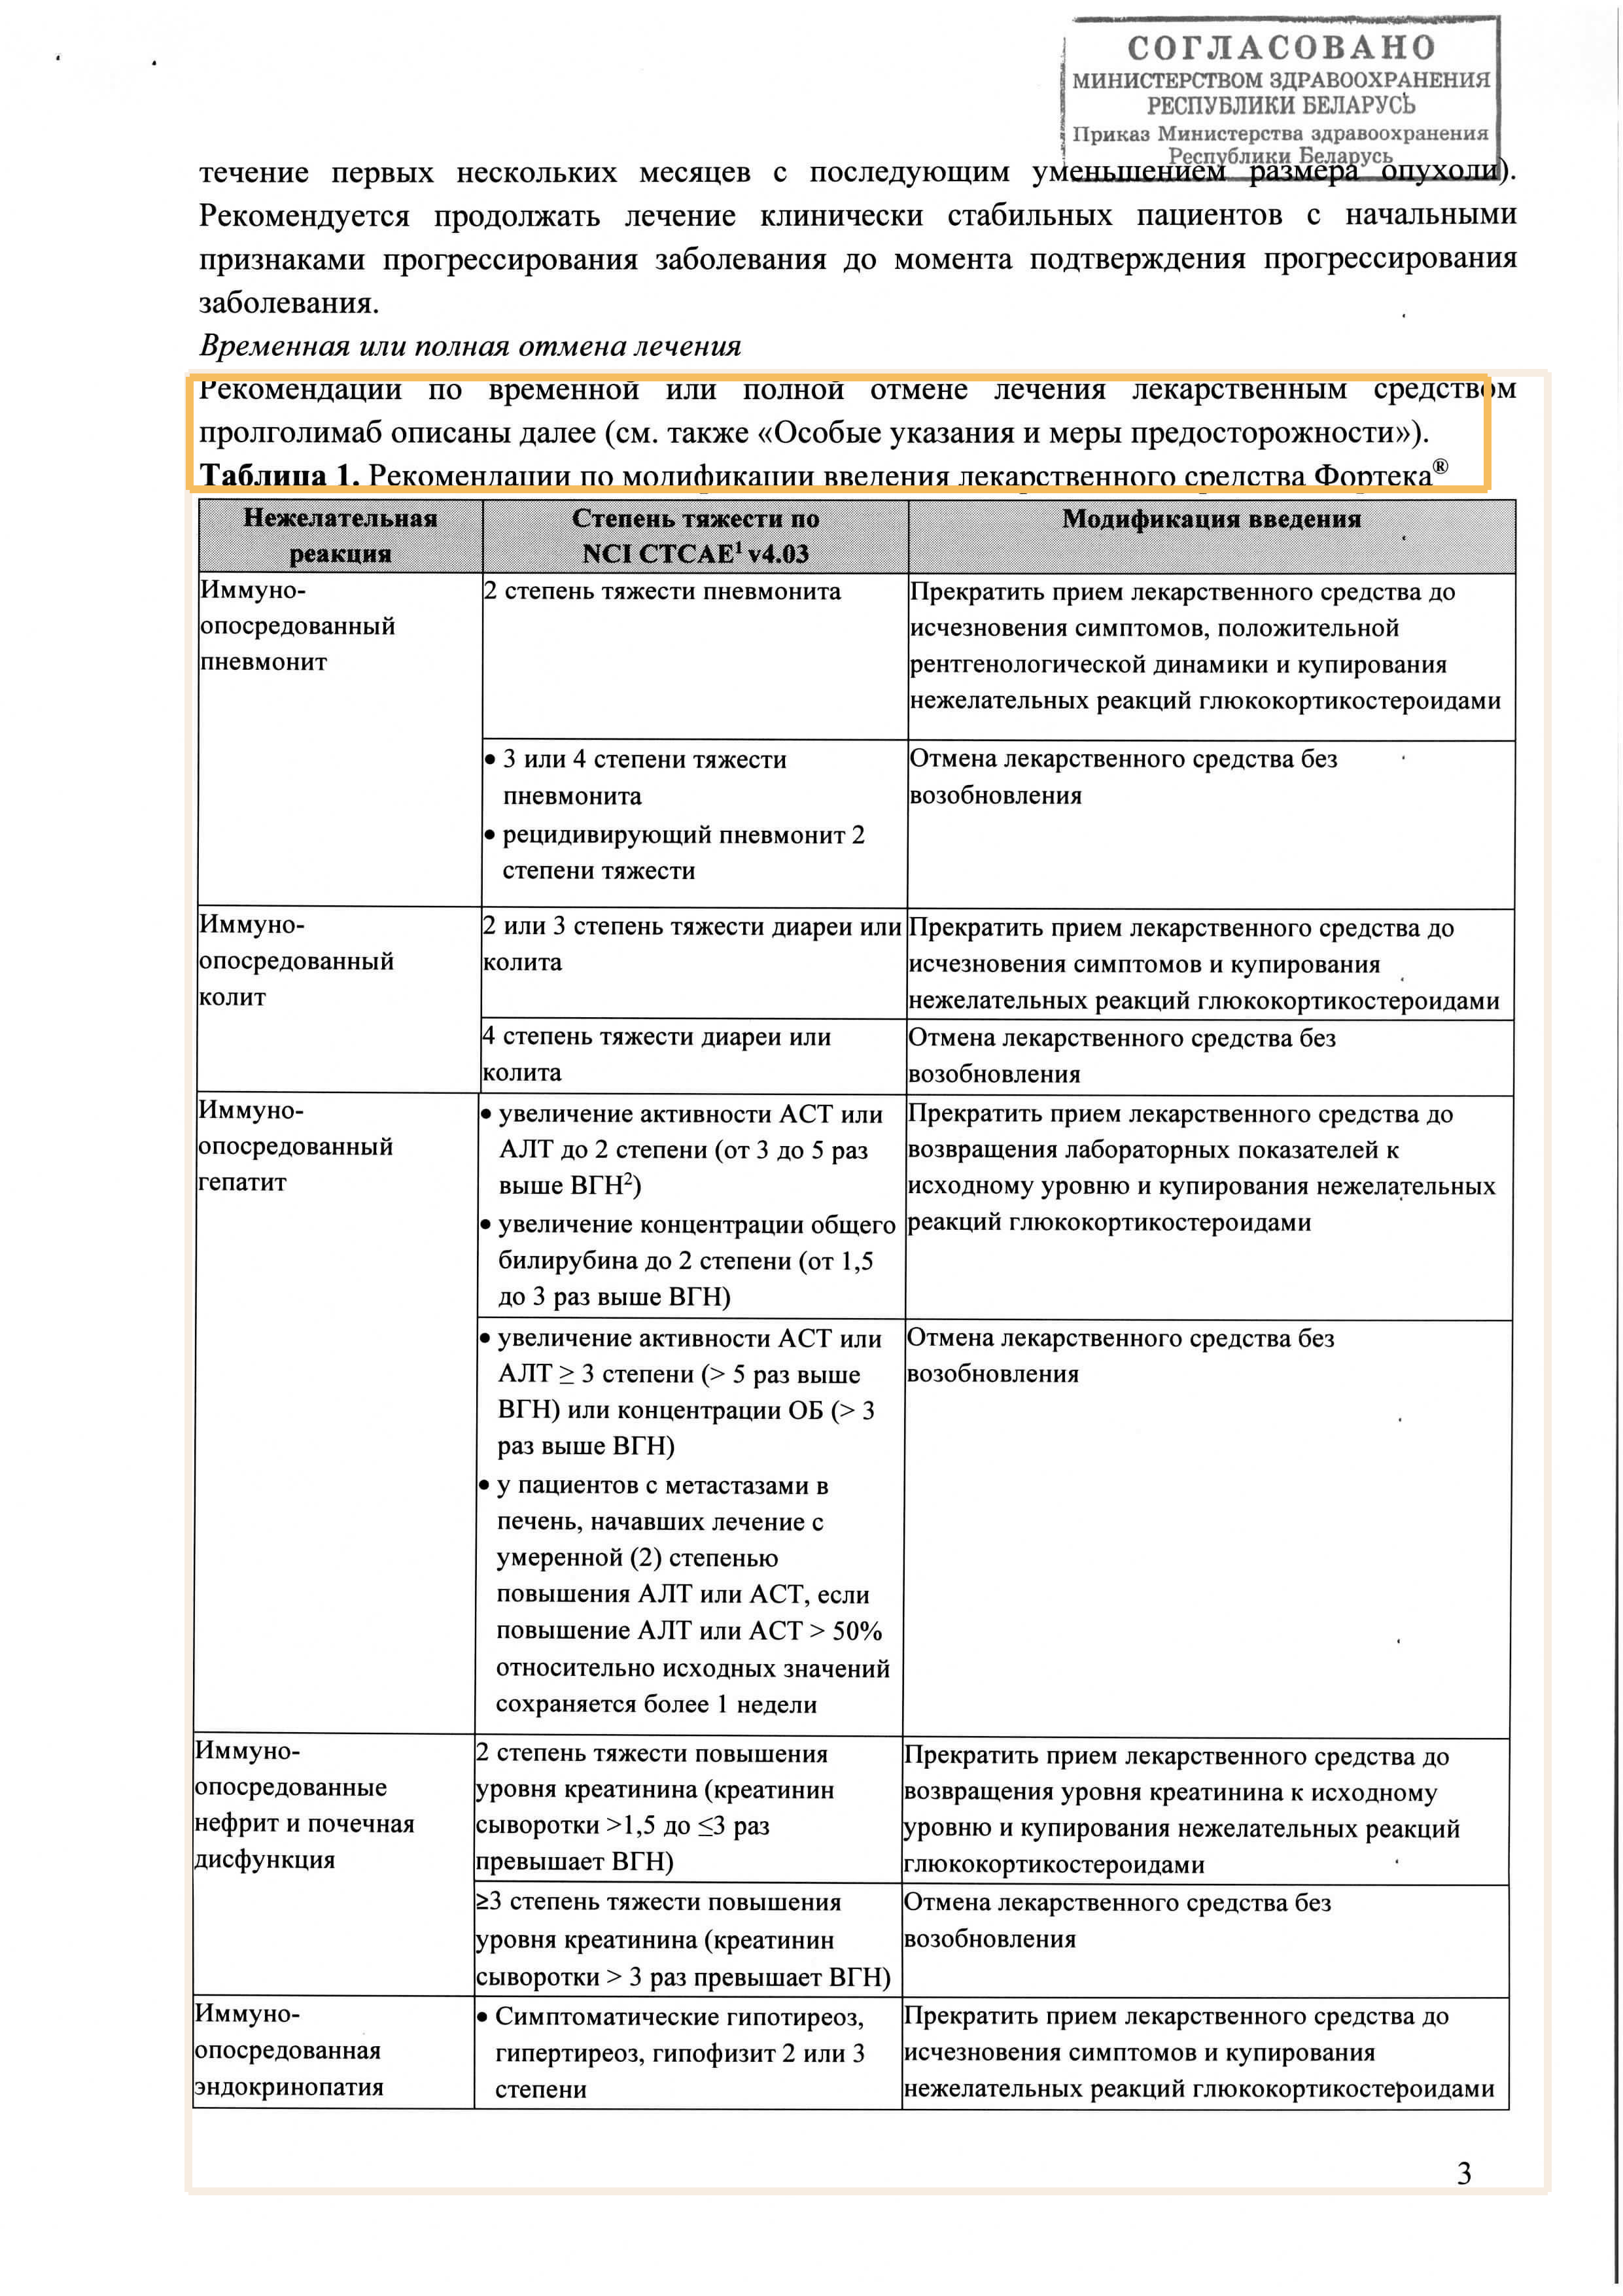

In [8]:
layout = model.detect(image)
lp.draw_box(image, layout)

In [9]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=288.8510437011719, y_1=569.5478515625, x_2=2365.494873046875, y_2=3350.909423828125), text=None, id=None, type=Figure, parent=None, next=None, score=0.8903056979179382), TextBlock(block=Rectangle(x_1=290.62188720703125, y_1=576.544921875, x_2=2273.40625, y_2=748.4247436523438), text=None, id=None, type=Text, parent=None, next=None, score=0.8238863348960876)], page_data={})

In [10]:
from PIL import Image
from surya.ocr import run_ocr
from surya.model.detection.segformer import load_model as load_det_model, load_processor as load_det_processor
from surya.model.recognition.model import load_model as load_rec_model
from surya.model.recognition.processor import load_processor as load_rec_processor


langs = ["ru"] # Replace with your languages
det_processor, det_model = load_det_processor(), load_det_model()
rec_model, rec_processor = load_rec_model(), load_rec_processor()

predictions = run_ocr([image], [langs], det_model, det_processor, rec_model, rec_processor)

c:\Users\apteka4\AppData\Local\miniconda3\envs\instr_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\apteka4\AppData\Local\miniconda3\envs\instr_env\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\apteka4\AppData\Local\miniconda3\envs\instr_env\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Loading detection model vikp/surya_det2 on device cpu with dtype torch.float32
Loading recognition model vikp/surya_rec on device cpu with dtype torch.float32


Recognizing Text:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\apteka4\AppData\Local\miniconda3\envs\instr_env\Lib\site-packages\transformers\generation\utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Recognizing Text: 100%|██████████| 3/3 [02:33<00:00, 51.24s/it]


In [11]:
predictions

[OCRResult(text_lines=[TextLine(polygon=[[1713.0, 55.0], [2195.0, 55.0], [2195.0, 92.0], [1713.0, 92.0]], confidence=0.8972535729408264, text='СОГЛАСОВАНО', bbox=[1713.0, 55.0, 2195.0, 92.0]), TextLine(polygon=[[1633.0, 105.0], [2284.0, 105.0], [2284.0, 138.0], [1633.0, 138.0]], confidence=0.964774489402771, text='МИНИСТЕРСТВОМ ЗДРАВООХРАНЕНИЯ', bbox=[1633.0, 105.0, 2284.0, 138.0]), TextLine(polygon=[[1744.0, 144.0], [2175.0, 144.0], [2175.0, 178.0], [1744.0, 178.0]], confidence=0.9490728378295898, text='РЕСПУБЛИКИ БЕЛАРУСЬ', bbox=[1744.0, 144.0, 2175.0, 178.0]), TextLine(polygon=[[1631.0, 187.0], [2284.0, 189.0], [2284.0, 221.0], [1631.0, 219.0]], confidence=0.9693337678909302, text='Приказ Министерства здравоохранения', bbox=[1631.0, 187.0, 2284.0, 221.0]), TextLine(polygon=[[294.0, 240.0], [2318.0, 225.0], [2320.0, 277.0], [296.0, 292.0]], confidence=0.9588156938552856, text='течение   первых   нескольких   месяцев   с   последующим   уменьшением   размера   бпухоли).', bbox=[294.0,